# Notebook with statistics tasks from Stepic course

In [1]:
male <- c(20, 11, 7)
female <- c(15, 12, 9)
names <- c("stop", "slow", "ignore")
df <- data.frame(male, female, row.names =names)
chisq.test(df, correct = FALSE)

# or without df
drivers <- rbind(male, female)
chisq.test(drivers, correct = FALSE)


	Pearson's Chi-squared test

data:  df
X-squared = 0.95441, df = 2, p-value = 0.6205



	Pearson's Chi-squared test

data:  drivers
X-squared = 0.95441, df = 2, p-value = 0.6205


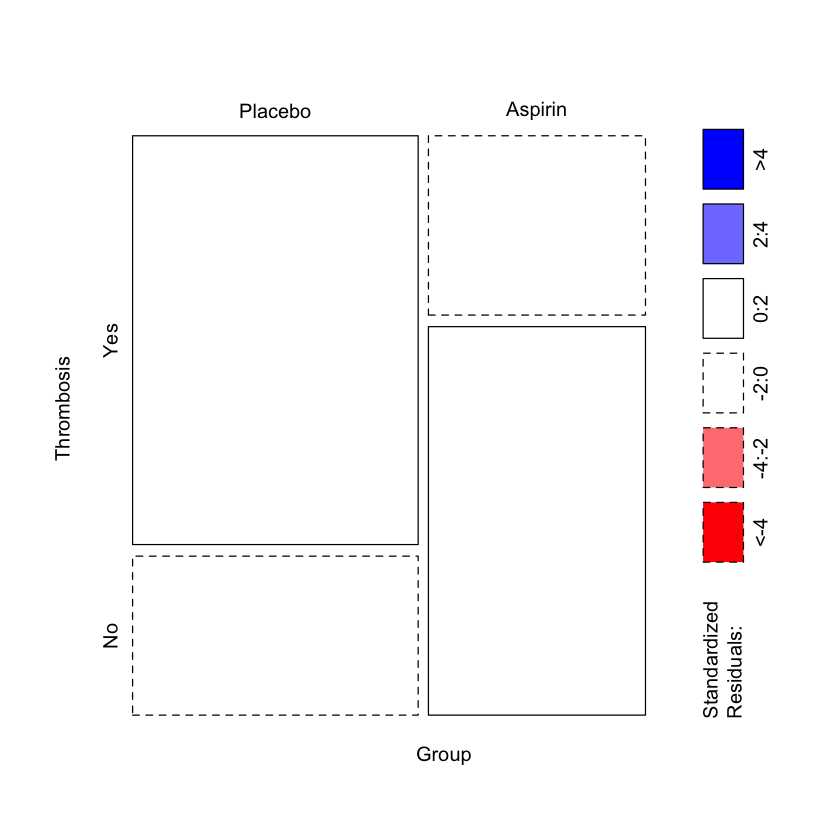

In [3]:
#воссоздадим таблицу
patients <- rbind(c(18, 7), c(6, 13))
#подпишем строки и столбцы
colnames(patients) <- c("Yes", "No")
rownames(patients) <- c("Placebo", "Aspirin")
#вот график, который нам нужен
mosaicplot(patients, color=T, shade=T, ylab="Thrombosis", xlab="Group", cex.axis=1, main="")

Итого:
- размер прямоугольников  соответствует количеству наблюдений.
- цвет прямоугольников - величине значимости отклонения ожидаемых и наблюдаемых частот в этой ячейке.
- если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.